In [1]:
#Script used for pie-wedge mesh, Feb 03,2020

In [2]:
import sys, os

sys.path.append('/Users/ajc/codes/simulator/debug/ats-mesh/tools/meshing_ats/meshing_ats')
import meshing_ats

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.signal
import importlib

In [3]:
print(meshing_ats.__file__)

/Users/ajc/codes/simulator/debug/ats-mesh/tools/meshing_ats/meshing_ats/meshing_ats.py


In [4]:
import math
def Distance(x,y):
    d = np.zeros(len(x))
    for i in range(len(x)):
        d[i] = math.hypot(x[-1] - x[i], y[-1] - y[i])
    return d

C
[0.         1.90171975 5.68200009 8.61462553] [4.968 5.521 5.169 5.099]
11 29
left 0.1901719748262033 11
right 0.23974663502900206 29


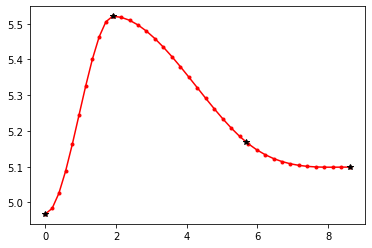

---------------------------------------------
center 5.521 4.521
(array([10]),) 2.75218221193 46


In [57]:
#Vladimir data
site_area = 'C'
case = 3
if site_area == 'C': 
    print (site_area)
    if case == 1:
        zv = np.array([5.099, 5.169, 5.321, 4.968])
    elif case == 2:
        zv = np.array([5.099, 5.169, 5.421, 4.968])
    elif case == 3:
        zv = np.array([5.099, 5.169, 5.521, 4.968])
    elif case == 4:
        zv = np.array([5.099, 5.169, 5.221, 4.968])
    else:
        print ('Cases should be: 1,2, 3, 4. Specified is',case)
        
    zv =zv[::-1]
    northing = [7910344.103,7910341.163,7910337.608, 7910335.845] #original
    easting = [585907.153,585907.605,585908.893,585909.606]
    distC = Distance(northing,easting)
    distC = distC[::-1]
    print (distC, zv)
    numx1 = int((distC[1] - distC[0]) / 0.17)
    numx2 = int((distC[-1] - distC[1]) / 0.23)
    print (numx1, numx2)
    xnew1 = np.linspace(distC[0],distC[1],numx1)
    xnew2 = np.linspace(distC[1],distC[-1],numx2)
    cs1 = scipy.interpolate.CubicSpline(distC[:2],zv[:2], bc_type='clamped')
    cs2 = scipy.interpolate.CubicSpline(distC[1:],zv[1:], bc_type='clamped')
    
print ('left', xnew1[1] - xnew1[0], numx1)
print ('right', xnew2[-1] - xnew2[-2], numx2)
    
plt.plot(xnew1, cs1(xnew1), '.-', color= 'r', label = 'fitted curve')
plt.plot(xnew2, cs2(xnew2), '.-', color= 'r')
plt.plot(distC, zv, '*', color= 'k', label='measured data')

plt.show()

if 'D' in site_area:
    xnew = xnew1
    zv = cs1(xnew1)
else:
    xnew = np.concatenate((xnew1,xnew2[1:]))
    zv = np.concatenate((cs1(xnew1), cs2(xnew2[1:])))
 
print ('---------------------------------------------')

assert len(zv) == len(xnew)



    
zv = np.round(zv, 5)
xnew = np.round(xnew,5)
print (observe,  max(zv),  max(zv)-1.0)
print (np.where(zv == max(zv)), x[10],len(x))

z_smooth = zv
x = xnew

In [58]:
xl =pd.ExcelFile('Topo_Profiles_Barrow.xlsx')
xl.sheet_names
print (xl.sheet_names)
data = xl.parse(sheet_name='Transect B, Area C')
keys = data.keys()

['Transect A, Polygon near ERT', 'Transect B, Polygon near ERT', 'Transect Area B', 'Transect A, Area C', 'Transect B, Area C', 'Repeat ERT Transect']


N3


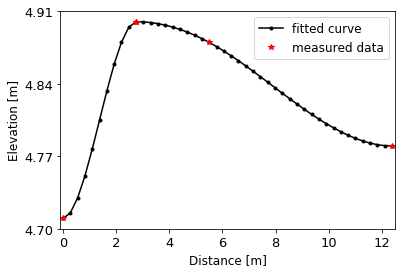

In [59]:
# smooth the topographic data : February 13 and trough cell inward oriented
length = len(data['Distance_m'])
x = []
z = []

x = np.array(data['Distance_m'][:46])
z = np.array(data['Z'][:46])

z = [z1 - 0.1127955 for z1 in z]
N3 = True
if (N3):
    print ('N3')
    rim = 4.9
    x1 = [x[0], x[10]]
    z1 = [4.71, rim]
    x2 = [x[10], x[20], x[-1]]
    z2 = [rim, rim-0.02, 4.78]
    cs1 = scipy.interpolate.CubicSpline(x1,z1, bc_type='clamped')
    cs2 = scipy.interpolate.CubicSpline(x2,z2, bc_type='clamped')
    
z_smooth = np.concatenate((cs1(x[:11]), cs2(x[11:])))

z_smooth = np.array([round(s,4) for s in z_smooth])

plt.plot(x, z_smooth, '.-', color = 'k',label = 'fitted curve')
plt.plot(x1,z1,'*', color='r')
plt.plot(x2,z2,'*', color='r',label='measured data')

#print np.array(x), x1, x2
#print z, z1,z2
plt.ylabel('Elevation [m]', fontsize=12,fontweight='normal')
plt.xlabel('Distance [m]',fontsize=12,fontweight='normal')
plt.tick_params(axis='both', which='major', labelsize=13)
#plt.title('Mesh, Polygon Area C (Mesh-N3)')
plt.xlim(-0.1,12.5)
plt.ylim(4.7,4.91)
plt.yticks(np.linspace(4.7,4.91,4))

plt.legend(fontsize=12)


In [60]:
print (x, z_smooth)
print (len(x), len(z_smooth))
print ('Seepage face high at the center ', max(z_smooth - z_smooth[0]))

[ 0.          0.27521822  0.55043644  0.82565466  1.10087288  1.37609111
  1.65130933  1.92652755  2.20174577  2.47696399  2.75218221  3.02740043
  3.30261865  3.57783688  3.8530551   4.12827332  4.40349154  4.67870976
  4.95392798  5.2291462   5.50436442  5.77958265  6.05480087  6.33001909
  6.60523731  6.88045553  7.15567375  7.43089197  7.70611019  7.98132841
  8.25654664  8.53176486  8.80698308  9.0822013   9.35741952  9.63263774
  9.90785596 10.18307418 10.45829241 10.73351063 11.00872885 11.28394707
 11.55916529 11.83438351 12.10960173 12.38481995] [4.71   4.7153 4.7298 4.751  4.7769 4.805  4.8331 4.859  4.8802 4.8947
 4.9    4.8998 4.8992 4.8981 4.8967 4.8948 4.8926 4.89   4.887  4.8837
 4.88   4.876  4.8717 4.8671 4.8623 4.8573 4.8521 4.8469 4.8416 4.8362
 4.8309 4.8257 4.8205 4.8154 4.8106 4.8059 4.8016 4.7975 4.7937 4.7903
 4.7873 4.7848 4.7828 4.7812 4.7803 4.78  ]
46 46
Seepage face high at the center  0.1900000000000004


C 10


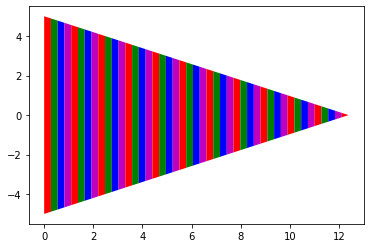

In [61]:
importlib.reload(meshing_ats)

if site_area == 'A':
    arclen = 16
elif site_area == 'B':
    arclen = 6
elif site_area == 'C':
    arclen = 10
elif site_area == 'D':
    arclen = 10
m2 = meshing_ats.Mesh2D.from_Transect_MakePieWedge(x,z_smooth, arclen, curved=False)

print (site_area, arclen)
m2.plot()

4.71 4.21 1.40296789
[1.40296789 1.87080658 2.33864526 2.80648395 3.27432263 3.74216132
 4.21      ]


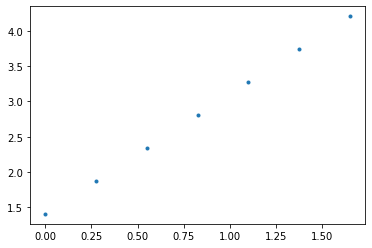

In [62]:
x0,x1 = x[0], x[6]
z_upper = z_smooth[0] - 0.5
z_lower = 1.40296789
print (z_smooth[0], z_upper, z_lower)

P = (x1,z_upper)
Q = (x0, z_lower)

P =(x[6],0)
xx = np.linspace(0,x[6],7)
Q = (z_upper,z_lower)

slope = (z_upper-z_lower)/(x[6]-0)
y = z_upper + slope*(xx-x[6])
#print (m)
plt.plot(xx,y,'.')
print (y)#,x[6],x)

In [47]:

Depth = []

Zmesh_spacing = []
dz=0.02
for j in range(25):
    z1 = z_smooth[0] - dz*j
    Depth.append(z1)
    Zmesh_spacing.append(dz)
#print ('Upper mineral ', Depth)
dz=0.02
z = 0
for j in range(25,25+34):
    dz *= 1.075
    z = z + dz
    Depth.append(Depth[24] - z)
    Zmesh_spacing.append(dz)
    #print (Depth[-1])
#print ('Ice rich new ', z, Depth)

l = len(Depth)
print ('LL: ',l)
X = 1.40296789

IRZ_layer=-2000*np.ones((m2.num_cells(), l-25))

print (IRZ_layer.shape)


for i in range(m2.num_cells()):
    irz = []
    #break
    y1 = z_upper + slope*(x[i]-x[7])
    if y1 >y[-1]:
        #print (i,y1,y[-1])
        break
    for j in range(25,25+34):
        if i ==0 :
            d = Depth[j]
        else:
            d = Depth[j] + 1*(z_smooth[i] - z_smooth[i-1])
            #print (Depth[j],d)
        if (x[i] <= x1 and d <= 4.468 and d>y1):
            irz.append(1010)
        else:
            irz.append(-2000)
    IRZ_layer[i][:] = irz#[::-1]

print (i,IRZ_layer[6],len(IRZ_layer[0]))
print ("---------------")        




LL:  59
(38, 34)
8 [-2000. -2000.  1010.  1010.  1010.  1010.  1010.  1010.  1010.  1010.
  1010.  1010.  1010.  1010.  1010. -2000. -2000. -2000. -2000. -2000.
 -2000. -2000. -2000. -2000. -2000. -2000. -2000. -2000. -2000. -2000.
 -2000. -2000. -2000. -2000.] 34
---------------
4.968 0.02
4.948 0.02
4.928 0.02
4.908 0.02
4.888 0.02
4.868 0.02
4.848 0.02
4.828 0.02
4.808 0.02
4.788 0.02
4.768 0.02
4.748 0.02
4.728 0.02
4.708 0.02
4.688 0.02
4.668 0.02
4.648 0.02
4.628 0.02
4.608 0.02
4.588 0.02
4.568 0.02
4.548 0.02
4.528 0.02
4.508 0.02
4.4879999999999995 0.02
4.4665 0.0215
4.443387499999999 0.023112499999999998
4.4185415625 0.024845937499999995
4.3918321796874995 0.026709382812499995
4.363119593164062 0.028712586523437493
4.332253562651367 0.030866030512695302
4.299072579850219 0.03318098280114745
4.263403023338986 0.03566955651123351
4.225058250089409 0.038344773249576025
4.183837618846115 0.041220631243294226
4.1395254402595745 0.04431217858654129
4.091889848279043 0.0476355919805

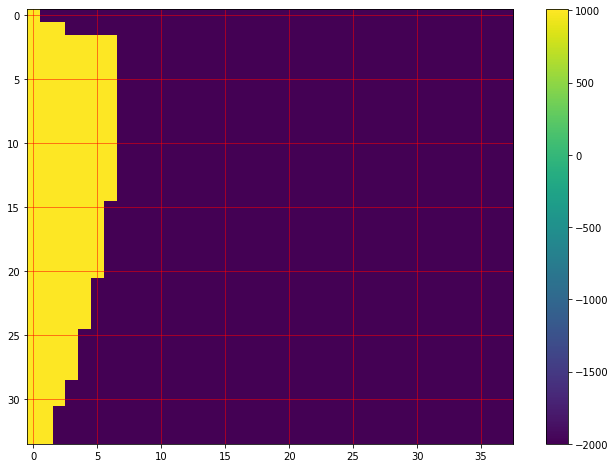

In [25]:
fig ,ax = plt.subplots(figsize=(12,8))
im = plt.imshow(IRZ_layer.transpose())

ax = plt.gca()
ax.grid(color='r', linewidth=0.5)
plt.colorbar()
ax.set_aspect('equal')
#for d in IRZ_layer:
#    print (d,len(d),m2.num_cells())#IRZ_layer.shape,m2.num_cells())



In [26]:

layer_types = []
layer_data = []
layer_ncells = []
layer_mat_ids = []

z=0
Z = []

for i in range(25):
    layer_types.append('constant')
    layer_data.append(0.02)
    layer_ncells.append(1)
    if i <2:
        layer_mat_ids.append(1001*np.ones((m2.num_cells(),),'i'))
    elif (i <5):
        layer_mat_ids.append(1002*np.ones((m2.num_cells(),),'i'))
    else:
        layer_mat_ids.append(1003*np.ones((m2.num_cells(),),'i'))
    z = z + 0.02
    Z.append(z)
print ('Moss ', z)

dz = .02
for i in range(34):
    dz *= 1.075
    layer_types.append("constant")
    layer_data.append(dz)
    layer_ncells.append(1)
    layer_mat_ids.append(-1003*np.ones((m2.num_cells(),),'i'))
    #layer_mat_ids.append(1003)
    z = z + dz
    Z.append(z)
    #print (z,dz)
print ('Ice rich', z,dz)

for i in range(25):
    dz *= 1.12
    layer_types.append("constant")
    layer_data.append(dz)
    layer_ncells.append(1)
    layer_mat_ids.append(1003*np.ones((m2.num_cells(),),'i'))
    #layer_mat_ids.append(1003)
    z = z + dz
    Z.append(z)
print ('lower mineral', z)


layer_types.append('snapped')
layer_data.append(-45.0) # bottom location
layer_ncells.append(1)
layer_mat_ids.append(1003*np.ones((m2.num_cells(),),'i'))
#layer_mat_ids.append(1003)
print (l-25)
mat_ids=np.zeros((m2.num_cells(), l-25),'i')
for i in range(m2.num_cells()):
    #print (i,IRZ_layer[i])
    for j in range(0,34):
        #print (j)
        #print (IRZ_layer[0])
        if IRZ_layer[i,j] == 1010:# and Depth[i,j]<= 4.468:
            mat_ids[i,j]= 1010#1010
            #print ('HERE')
        else:
            mat_ids[i,j]= 1003#1003



for j in range(l-25):
    layer_mat_ids[j+25] = mat_ids[:,j]
    
print (layer_mat_ids[25])
print (layer_mat_ids[56])
m3 = meshing_ats.Mesh3D.extruded_Mesh2D(m2, layer_types, 
                                        layer_data, 
                                        layer_ncells, 
                                        layer_mat_ids)
file= "areaC-3layers-Vladimir-om10cm-case%g.exo"%case
m3.write_exodus(file.encode('utf8'))


Moss  0.5000000000000001
Ice rich 3.5650321116278354 0.23383944964845352
lower mineral 38.485197160059805
34
[1010 1003 1003 1003 1003 1003 1003 1003 1003 1003 1003 1003 1003 1003
 1003 1003 1003 1003 1003 1003 1003 1003 1003 1003 1003 1003 1003 1003
 1003 1003 1003 1003 1003 1003 1003 1003 1003 1003]
[1010 1010 1003 1003 1003 1003 1003 1003 1003 1003 1003 1003 1003 1003
 1003 1003 1003 1003 1003 1003 1003 1003 1003 1003 1003 1003 1003 1003
 1003 1003 1003 1003 1003 1003 1003 1003 1003 1003]
BASENAME_FILE_Exodus:  areaC-3layers-Vladimir-om10cm-case4.exo
areaC-3layers-Vladimir-om10cm-case4
Opening exodus file: areaC-3layers-Vladimir-om10cm-case4.exo
Closing exodus file: areaC-3layers-Vladimir-om10cm-case4.exo
